In [1]:
# the original code is from https://github.com/bhaswara/CV_24T3/tree/main, created by Irfan Dwiki Bhaswaraimport
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, classification_report

In [3]:
# In this demo, we are using MNIST dataset
from sklearn import datasets

digits = datasets.load_digits()
pd = datasets.load_digits()
print('Digits dictionary content \n{}'.format(digits.keys()))

Digits dictionary content 
dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])


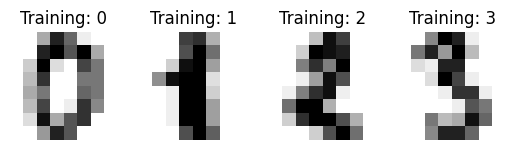

In [4]:
images_and_labels = list(zip(digits.images, digits.target))
for index, (data, label) in enumerate(images_and_labels[:4]):
    imgdim=int(np.sqrt(digits.data[index].shape[0]))
    img=np.reshape(digits.data[index],(imgdim,imgdim))
    plt.subplot(2, 4, index + 1)
    plt.axis('off')
    plt.imshow(img, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(digits.data,digits.target,test_size=0.25)
print('Training data and target sizes: \n{}, {}'.format(X_train.shape,y_train.shape))
print('Test data and target sizes: \n{}, {}'.format(X_test.shape,y_test.shape))

Training data and target sizes: 
(1347, 64), (1347,)
Test data and target sizes: 
(450, 64), (450,)


In [7]:
## Using DT
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

dt_predicts = dt.predict(X_test)

accuracy = accuracy_score(y_test, dt_predicts)
print(f'Accuracy: {accuracy:.4f}')

# Classification report
print(classification_report(y_test, dt_predicts))

Accuracy: 0.8622
              precision    recall  f1-score   support

           0       0.90      0.98      0.94        47
           1       0.79      0.79      0.79        48
           2       0.86      0.88      0.87        42
           3       0.88      0.84      0.86        45
           4       0.91      0.85      0.88        47
           5       0.98      0.87      0.92        46
           6       0.91      0.91      0.91        55
           7       0.85      0.80      0.82        35
           8       0.71      0.79      0.75        43
           9       0.84      0.88      0.86        42

    accuracy                           0.86       450
   macro avg       0.86      0.86      0.86       450
weighted avg       0.87      0.86      0.86       450



In [22]:
## Using KNN
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

knn_predicts = knn.predict(X_test)

accuracy = accuracy_score(y_test, knn_predicts)
print(f'Accuracy Score: {accuracy:.4f}')

# Classification report
print(classification_report(y_test, knn_predicts))

Accuracy Score: 0.9889
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       0.98      1.00      0.99        50
           2       1.00      1.00      1.00        38
           3       0.94      1.00      0.97        50
           4       1.00      1.00      1.00        47
           5       1.00      1.00      1.00        38
           6       1.00      1.00      1.00        47
           7       1.00      0.98      0.99        44
           8       1.00      0.98      0.99        43
           9       0.98      0.94      0.96        50

    accuracy                           0.99       450
   macro avg       0.99      0.99      0.99       450
weighted avg       0.99      0.99      0.99       450



In [23]:
sgd = SGDClassifier()
sgd.fit(X_train, y_train)

sgd_predicts = sgd.predict(X_test)

accuracy = accuracy_score(y_test, sgd_predicts)
print(f'Accuracy: {accuracy:.4f}')

# Classification report
print(classification_report(y_test, sgd_predicts))

Accuracy: 0.9511
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       0.96      0.86      0.91        50
           2       1.00      0.97      0.99        38
           3       0.96      0.96      0.96        50
           4       1.00      0.98      0.99        47
           5       0.90      0.95      0.92        38
           6       1.00      1.00      1.00        47
           7       1.00      0.95      0.98        44
           8       0.80      0.95      0.87        43
           9       0.92      0.90      0.91        50

    accuracy                           0.95       450
   macro avg       0.95      0.95      0.95       450
weighted avg       0.95      0.95      0.95       450



In [ ]:
'''
Hints and Steps reading Chinese MNIST
(1) Use csv file provided to split the dataset according to its classes. 
    You can create function which take the image path as well as class label
(2) To read the image, make sure to read it in grayscale and don't forget to flatten it.
(3) Use train_test_split from sklearn to split data. You can directly use your csv file into this. 
    Make sure to set the random_state to be the same and don't forget to use stratify so your classes have the same number.
    You can define the number of training and testing set as well
'''

In [2]:
'''
About Chinese MNIST dataset
https://www.kaggle.com/datasets/gpreda/chinese-mnist/data

One hundred Chinese nationals took part in data collection. Each participant wrote with a standard black ink pen all 15 numbers 
in a table with 15 designated regions drawn on a white A4 paper. 
This process was repeated 10 times with each participant. Each sheet was scanned at the resolution of 300x300 pixels.

Code is used to map each single character and it will be the one used for the target variable.
Each character is present 1K times (15 characters = 15K entries) with own hand written image.
The total number of classes to predict are 15.

'''

,suite_id,sample_id,code,value,character,file
0,1,1,10,9,九,input_1_1_10.jpg
1,1,10,10,9,九,input_1_10_10.jpg
2,1,2,10,9,九,input_1_2_10.jpg
3,1,3,10,9,九,input_1_3_10.jpg
4,1,4,10,9,九,input_1_4_10.jpg


code  character
1     零            1000
2     一            1000
3     二            1000
4     三            1000
5     四            1000
6     五            1000
7     六            1000
8     七            1000
9     八            1000
10    九            1000
11    十            1000
12    百            1000
13    千            1000
14    万            1000
15    亿            1000
dtype: int64